# Health Survey Data Analysis

Chris Lyons

## Executive Summary


Telephone survey data was used to evaluate the correlation between chronic health problems and home ownership status.  A total of 14769 people responded to surveys conducted by the state of New York and the CDC, 13659 of which were used.  Respondents were excluded if they replied don't know (PHYSHLTH - 248, RENTHOM1- 57), refused to answer (PHYSHLTH - 81, RENTHOM1 - 147), or had a living arrangement that wasn't renting or owning (608).  Of the remaining 13659 respondents, the mean number of days reported as feeling unwell during the past 30 days was 3.06 (95% CI: 2.93 to 3.19). The difference in means for those who reported owning a home (2.68) and renting (3.70) was highly significant (p < 0.001).  Further analysis is needed to investigate potential causes for the reported difference in health status.

## The Data

The CDC's Behavioral Risk Factor Surveillance System (BRFSS), a monthly telephone survey conducted by state health departments in coordination with the CDC, was the source of all data contained in this analysis. The majority of the interviews took place in the year 2020 (14,665) and the remainder took place in the year 2021 (104).  All of the responses were from the state of New York.  There were 279 columns of data, two of which were the primary focus of this analysis.  The column PHYSHLTH recorded responses from the question "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?". Possible responses were number of days (1-30), none, don't know, refused, or not asked / missing.  The second column of interest, RENTHOM1, asked the question "Do you own or rent your home?"  Possible responses were own, rent, other arrangement, don't know, refused, or not asked / missing.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

C:\Users\eincr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
# The majority of the responses came from 2020.

df['IYEAR'].value_counts()

2020    14665
2021      104
Name: IYEAR, dtype: int64

In [4]:
# All of the responses came from a single state (New York)

df['_STATE'].value_counts()

36    14769
Name: _STATE, dtype: int64

## Data Preparation

The columns PHYSHLTH and RENTHOM1 both contain responses from people who didn't know or refused to answer.  These responses (77 and 99 for PHYSHLTH, 7 and 9 for RENTHOM1) were excluded from the analysis. RENTHOM1 had an “other arrangement” category (recorded as 3) which was also excluded.  PHYSHLTH recorded the response O days as 88, thus all 88's were changed back to zeros in order to calculate the correct mean.  Neither the PHYSHLTH nor RENTHOM1 columns had null values, thus no nulls were dropped.

In [5]:
# Zero null values. 

rentphys = df[['PHYSHLTH', 'RENTHOM1']]
print(rentphys.head())
print(rentphys.isna().value_counts())

   PHYSHLTH  RENTHOM1
0      88.0       2.0
1      14.0       1.0
2      88.0       2.0
3       5.0       3.0
4      88.0       2.0
PHYSHLTH  RENTHOM1
False     False       14769
dtype: int64


In [6]:
df[['PHYSHLTH']].value_counts()

PHYSHLTH
88.0        10565
30.0          768
2.0           597
1.0           410
5.0           367
3.0           361
77.0          248
10.0          231
7.0           209
15.0          194
4.0           163
20.0          147
14.0          144
99.0           81
25.0           55
6.0            47
8.0            45
21.0           26
12.0           22
28.0           22
9.0            11
29.0            8
13.0            7
17.0            6
16.0            6
18.0            6
27.0            5
24.0            5
11.0            4
26.0            3
23.0            3
19.0            2
22.0            1
dtype: int64

In [7]:
df[['RENTHOM1']].value_counts()

RENTHOM1
1.0         8587
2.0         5370
3.0          608
9.0          147
7.0           57
dtype: int64

In [8]:
# This code converts the 88's to zeros and drops the "I don't know" 
# or refused to answer responses.

rentphys.loc[:,'PHYSHLTH'] = rentphys['PHYSHLTH'].replace([88], 0)
rentphys = rentphys.loc[rentphys['PHYSHLTH'] < 31]

C:\Users\eincr\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [9]:
# This code drops the "I don't know" or refused to answer responses.

rentphys = rentphys.loc[rentphys['RENTHOM1'] < 3]

In [11]:
len(rentphys)

13659

## Confidence Interval for Mean of `PHYSHLTH`

In [15]:
import math

n = len(rentphys['PHYSHLTH'])
x_bar = np.mean(rentphys['PHYSHLTH'])
std = rentphys['PHYSHLTH'].std(ddof=1)
se  = std / math.sqrt(n)

ci = stats.t.interval(
    alpha=0.95,         
    df= n - 1, 
    loc = x_bar,  
    scale=se)


print('PHYSHLTH Mean:', x_bar)
print('PHYSHLTH Standard Deviation:', std)
print('PHYSHLTH Standard Error:', se)
print('PHYSHLTH Confidence Interval:', ci)

PHYSHLTH Mean: 3.064646020938575
PHYSHLTH Standard Deviation: 7.581325164851767
PHYSHLTH Standard Error: 0.06486877124339503
PHYSHLTH Confidence Interval: (2.9374942974789575, 3.1917977443981926)


The overall mean of PHYSHLTH was 3.06 days reported unwell with a 95% confidence interval that ranged from 2.94 to 3.19.   3.06 is a point estimate, or best guess, as to what the true population mean is.   The 2.9374942974789575 to 3.1917977443981926 confidence interval is the range where we are 95% certain the true population mean lies if the entire 2020 population of New York were to have participated in the survey.

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

The data was split into two categories based on whether a person reported owning or renting a home.  The respective responses for the PHYSHLTH question were stored into two separate dataframes, namely own and rent. The mean response for owning a home was 2.68 with a standard deviation of 7.1 and the mean response for renting a home was 3.70 with a standard deviation of 8.3. There were more people who owned a home (8453) than people who rented (5206).

In [16]:
own  = rentphys.loc[rentphys['RENTHOM1'] == 1, "PHYSHLTH"]
rent = rentphys.loc[rentphys['RENTHOM1'] == 2, "PHYSHLTH"]

In [17]:
rentphys.groupby('RENTHOM1')["PHYSHLTH"].describe()

,count,mean,std,min,25%,50%,75%,max
RENTHOM1,,,,,,,,
1.0,8453.0,2.675855,7.108881,0.0,0.0,0.0,0.0,30.0
2.0,5206.0,3.695928,8.253077,0.0,0.0,0.0,2.0,30.0


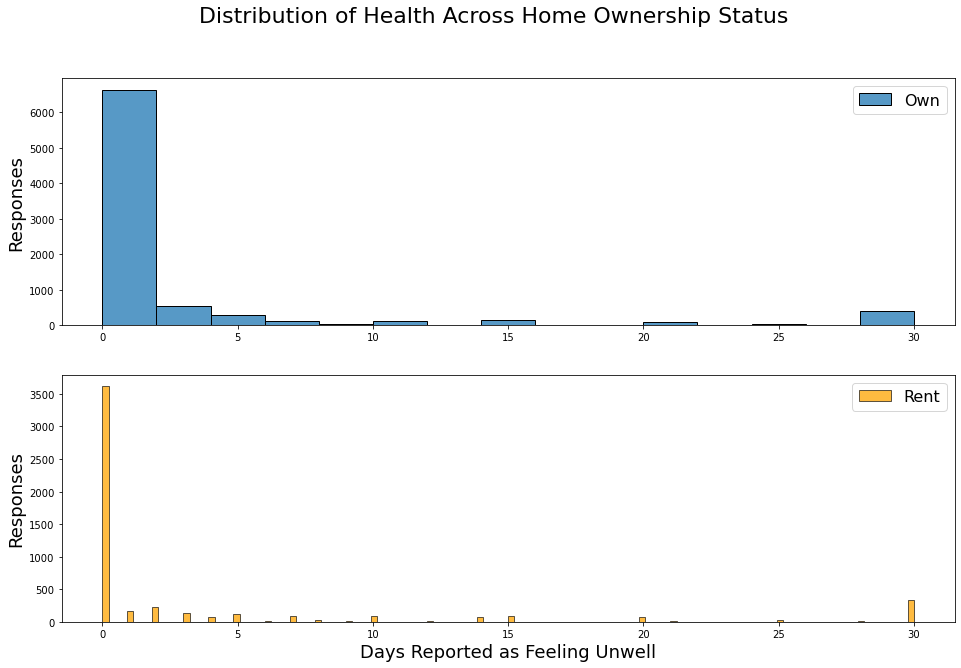

In [18]:
fig, ax = plt.subplots(figsize=(16,10), nrows=2)
plt.suptitle('Distribution of Health Across Home Ownership Status', size=22)
plt.subplot(2,1,1)
sns.histplot(data = own, label = 'Own')
plt.xlabel('', fontsize=18)
plt.ylabel('Responses', fontsize=18)
plt.legend(fontsize=16)

plt.subplot(2,1,2)
sns.histplot(data = rent, label = 'Rent', color = 'orange')    
plt.xlabel('Days Reported as Feeling Unwell', fontsize=18)
plt.ylabel("Responses", fontsize=18)
plt.legend(fontsize=16);

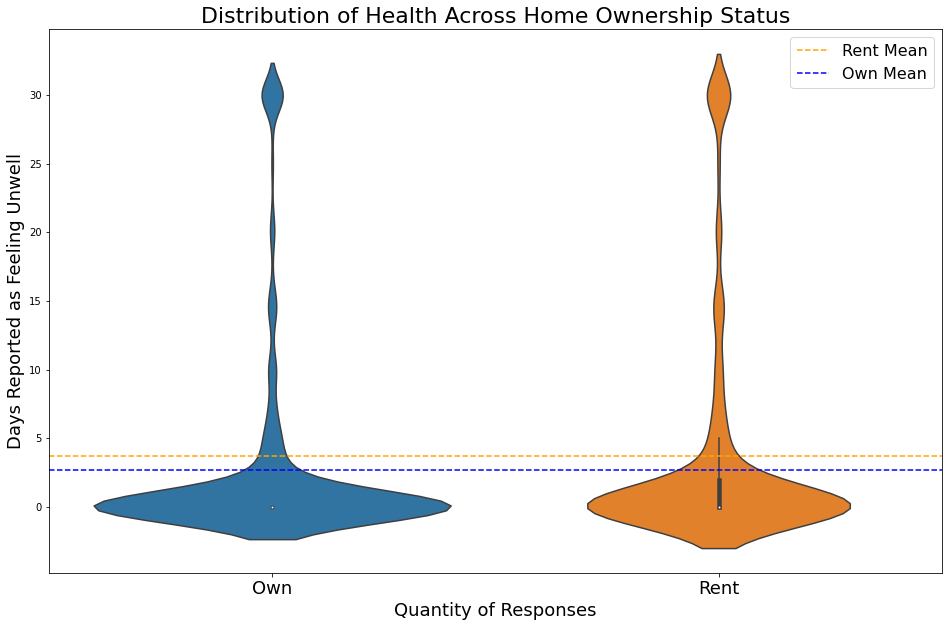

In [19]:
fig, ax = plt.subplots(figsize=(16,10))
sns.violinplot(data=rentphys, x='RENTHOM1', y='PHYSHLTH')
ax.set_title('Distribution of Health Across Home Ownership Status', size=22)
ax.set_xlabel('Quantity of Responses', fontsize=18)
ax.set_ylabel('Days Reported as Feeling Unwell', fontsize=18)
ax.set_xticklabels(labels=['Own', 'Rent'], fontsize=18)
plt.axhline(y=3.70, color='Orange', linestyle='--', label='Rent Mean')
plt.axhline(y=2.68, color='b', linestyle='--', label='Own Mean')
plt.legend(fontsize=16);

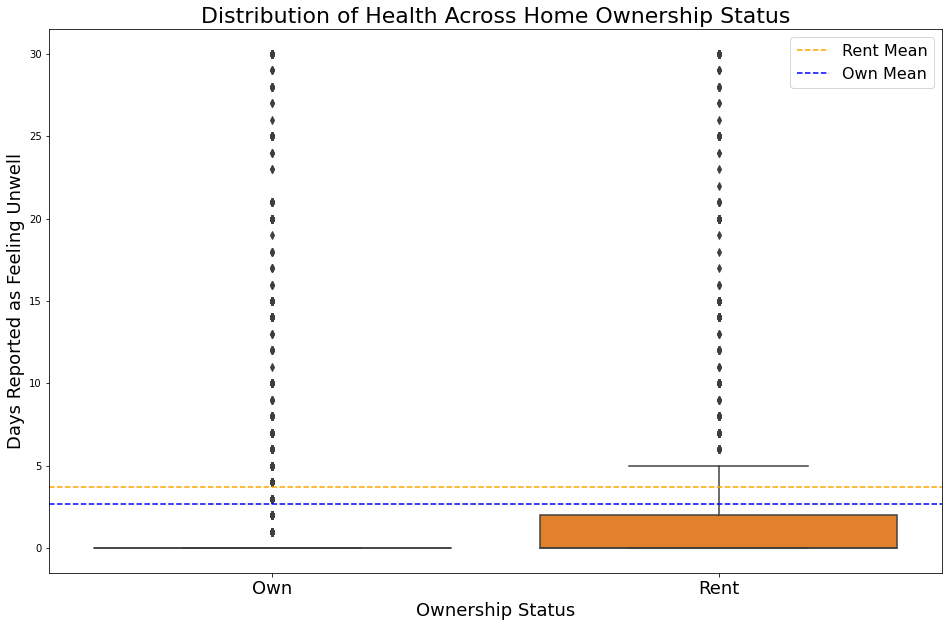

In [20]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(data=rentphys, x='RENTHOM1', y='PHYSHLTH', ax=ax)
ax.set_title('Distribution of Health Across Home Ownership Status', size=22)
ax.set_xlabel('Ownership Status', fontsize=18)
ax.set_ylabel('Days Reported as Feeling Unwell', fontsize=18)
ax.set_xticklabels(labels=['Own', 'Rent'], fontsize=18)
plt.axhline(y=3.70, color='Orange', linestyle='--', label='Rent Mean')
plt.axhline(y=2.68, color='b', linestyle='--', label='Own Mean')
plt.legend(fontsize=16);

Three graphs were used to show the difference in responses for the own and renting samples.  The first, a histogram, revealed that the vast majority of responses were zero days for both groups (greater than 6000 for own, greater than 3500 for rent). Both groups also had a large number of 30-day responses which is indicative of chronic disease. It should be noted that ownership and rent samples are not the same size, thus caution must be used when interpreting the histogram as the different sample sizes results in a difference in scale. 

The second graph, a violin plot, showed that responses for both groups were heavily weighted towards 5 or less days of feeling unwell, and another large number of responses occurred near or at 30 days.  The shape of the two violin plots is quite similar and thus it is not immediately apparent whether the difference in mean is due to more renters reporting feeling unwell or a greater number of days reported as unwell by those renters who do report sickness.  A more sophisticated statistical analysis is needed to determine which of those two options has greater impact on the observed means.  The violin plot is not as affected by scalar differences (when compared to a histogram) but there may be some residual effect as the quantity of responses is what is being plotted. 

The third graph, a box plot, was used to show the interquartile range and outliers.   In the case of home ownership, the data was so heavily weighted to zero that the entire interquartile range is zero and the box plot interpreted any other response as an outlier.   A similar result was seen in the rent sample, with the upper bound of the interquartile range being 2.0 instead of 0.  The differences in the interquartile range and means of the rent and ownership samples indicate that there could be a statistically important difference between the two groups. 

### Is the Difference Statistically Significant?

In order to determine whether or not the rent and own groups were statistically distinct from one another, a one-tailed T-Test was run.  The difference in the number of respondents in the two groups meant that a Welch's T-test was the most appropriate T-test.  The null hypothesis was "The mean number of days renters reported as feeling unwell was the same or less than the mean number of days owners reported as feeling unwell." The alternative hypothesis was "The mean number of days renters reported as feeling unwell was greater than the mean number of days owners reported as feeling unwell." 

Null: The mean number of days renters reported as feeling unwell is the same or less than the mean number of days owners reported as feeling unwell.

Alternative: The mean number of days renters reported as feeling unwell is greater than the mean number of days owners reported as feeling unwell.

In [21]:
results = stats.ttest_ind(a=rent, b=own, equal_var=False, alternative='greater')
results

Ttest_indResult(statistic=7.388322797834266, pvalue=8.042322148245843e-14)

The p-value for the Welch's T-test was 8.04e-14 which was a highly significant result as it was much less than the alpha significance level of 0.05.  The null hypothesis can be confidently rejected.

## Next Steps

A more in-depth statistical analysis is needed to evaluate whether a greater number of responses of feeling unwell or a greater number of days reported as unwell by those renters who do report sickness is more responsible for the observed differences in mean between the rent and own samples.
 
Evaluating the influence of cofounding variables must also be done.  This analysis does not prove causation as it is entirely possible that high medical costs associated with chronic conditions cause people to rent rather than rent status results in chronic conditions. Ideally, one would have access to anonymized out-of-pocket medical costs to examine the hospital bill cofounder, but that isn't possible with this dataset. The closest survey result is MEDCOST which asks people whether they failed to see a doctor when they needed to because of cost.  Other likely cofounders are smoking, drinking, age, gender, and obesity.  The calculated values SMOKER3, DRNKWK1, AGEG5YR, SEX, and BMI5CAT can be used to help evaluate such cofounders.  The confounder illicit drug use (excluding marijuana which can be assessed by MARIJAN1), cannot be assessed as relevant questions weren't asked.  Multiple regression analysis and propensity score matching are two statistical methodologies that can be used to assess the impact of the aforementioned cofounders.  It should be noted that the propensity score matching results would have to be approached with caution as any resulting statistically significant p-values could be the result of cofounders not able to be properly assessed such as illicit drug use.